# Comparison between Biotope and Vegetation data
Compares the two different shape files found in the Chernobyl data set.

In [7]:
import geopandas as gpd
import pathlib
import matplotlib.pyplot as plt
# from src.constants import GWS_DATA_DIR

GWS_DATA_DIR = pathlib.Path("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity")

# Getting biotope data
bio_path = GWS_DATA_DIR / "chernobyl_habitat_data" / "Biotope_EUNIS_ver1.shp"
bio_data = gpd.read_file(bio_path)

# getting vegetation data
veg_path = GWS_DATA_DIR / "chernobyl_habitat_data" / "Vegetation_mape.shp"
veg_data = gpd.read_file(veg_path)

<AxesSubplot:title={'center':'veg_data'}>

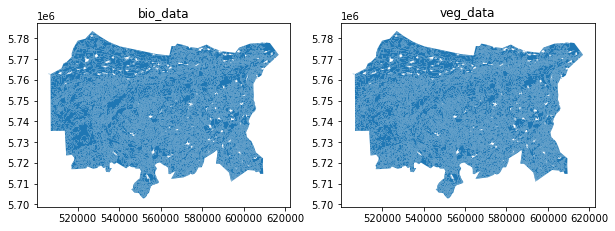

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.set_title("bio_data")
bio_data.plot(ax=ax1)
ax2.set_title("veg_data")
veg_data.plot(ax=ax2)

In [ ]:
import folium

# TODO: fix coordinates to actual location
m2 = folium.Map([51.386998452, 30.092666296],
                  zoom_start=8,
                  tiles='cartodbpositron')

In [ ]:
# This block adds the data provided by Tom and Adham

# This adds a number for each category for color coding
bio_data['Eunis_name_num'] = bio_data.Eunis_name.astype('category').cat.codes.astype('int64')

# Adding the colored polygons for both datasets
bio_choropleth = folium.Choropleth(bio_data, data=bio_data, key_on='feature.properties.OBJECTID',
                                   columns=['OBJECTID','Eunis_name_num'], fill_color= 'YlOrBr', 
                                   name="bio_data")
bio_choropleth.add_to(m2)
# Adding the labels
folium.features.GeoJsonPopup(fields=['Eunis_name'], labels=True ).add_to(bio_choropleth.geojson)

veg_data['index'] = veg_data.index
veg_choropleth = folium.Choropleth(veg_data, data=veg_data, key_on='feature.properties.index',
                                   columns=['index','Vegetation'], fill_color='YlOrBr', 
                                   name="veg_data")
veg_choropleth.add_to(m2)

# Adding more layers (satellite and openstreetmap)
folium.TileLayer(tiles='OpenStreetMap').add_to(m2)
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m2)


In [ ]:
# Adding geojson files of exclusion zone from Simon Mathis
exclusion_json_path = GWS_DATA_DIR / "chernobyl_exclusion_zone_v1.geojson"
exc_data = gpd.read_file(exclusion_json_path)

def get_style_function(color = '#ff0000'):
    return lambda x: {'fillColor': color, 'color': color}

colors = ['#000000','#ffff99','#ff9933','#990000','#ff0000','#000000']

for index, row in exc_data.iterrows():
    folium.GeoJson(row['geometry'], name=row['name'], style_function=get_style_function(colors[index])).add_to(m2)

# Adding layer control legend 
# (needs to be after all layers added)
folium.LayerControl().add_to(m2)

In [ ]:
m2

In [9]:
# Btw this is probably where EUNIS comes from:
# https://eunis.eea.europa.eu/
display("Bio_data", bio_data.head(3))
display("Veg_data", veg_data.head(3))

'Bio_data'

,OBJECTID,N_Eunis,Eunis_name,Shape_Leng,Shape_Area,Leg,AREA,geometry
0,44,C,Inland surface waters,1738.710883,77048.834598,1,7.70488,"POLYGON Z ((567349.222 5719076.917 0.000, 5673..."
1,45,C,Inland surface waters,33664.380335,329068.268246,1,32.90680,"POLYGON Z ((567359.453 5724545.845 0.000, 5673..."
2,46,C,Inland surface waters,1959.774812,92434.934227,1,9.24349,"POLYGON Z ((583966.896 5730868.298 0.000, 5840..."


'Veg_data'

,Vegetation,AREA,geometry
0,1,24.85380,"POLYGON Z ((547927.772 5710698.315 0.000, 5479..."
1,1,7.91757,"POLYGON Z ((550978.781 5711148.814 0.000, 5510..."
2,1,7.86063,"POLYGON Z ((594252.852 5711098.250 0.000, 5940..."


In [10]:
# Get a list of the Eunis labels
bio_data.Eunis_name.unique().tolist()
#print("Number of polygons:", len(bio_data))

['Inland surface waters',
 'Active, relatively undamaged raised bogs',
 'Transition mires and quaking bogs',
 'Reedbeds normally without free-standing water',
 'Beds of large sedges normally without free-standing water',
 'Permanent mesotrophic pastures and aftermath-grazed meadows',
 'Agriculturally-improved, re-seeded and heavily fertilised grassland, including sports fields and grass lawns',
 'Subcontinental riverine meadows',
 'Anthropogenic herb stands',
 'Tall-herb communities of humid meadows',
 'Grey willow carrs',
 'Eastern European poplar-willow forests',
 'Sarmatic ash-alder woods',
 'Sarmatic riverine Quercus forests',
 'East European swamp alder woods',
 'Meso-acidophilous birch swamp woods',
 'Lowland nemoral Populus tremula woods',
 'Mixed lime-oak-hornbeam forests',
 'Sarmatic dry alder woods',
 'Subcontinental moss Scots pine forests',
 'Subcontinental lichen Scots pine forests',
 'Subcontinental moorgrass Scots pine forests',
 'Boreo-nemoral bilberry western spruce ta

In [11]:
len(veg_data)

14910

In [12]:
len(bio_data)

13616

In [13]:
merged_data = veg_data.merge(bio_data, on='AREA') # validate="one_to_one")
print(len(merged_data))
merged_data.head()

13259


,Vegetation,AREA,geometry_x,OBJECTID,N_Eunis,Eunis_name,Shape_Leng,Shape_Area,Leg,geometry_y
0,1,24.85380,"POLYGON Z ((547927.772 5710698.315 0.000, 5479...",5172,G3.42112,Subcontinental lichen Scots pine forests,4433.602486,248538.415009,21,"POLYGON Z ((547927.772 5710698.315 0.000, 5479..."
1,1,7.91757,"POLYGON Z ((550978.781 5711148.814 0.000, 5510...",5173,G3.42112,Subcontinental lichen Scots pine forests,1570.997417,79175.713704,21,"POLYGON Z ((550978.781 5711148.814 0.000, 5510..."
2,1,7.86063,"POLYGON Z ((594252.852 5711098.250 0.000, 5940...",5174,G3.42112,Subcontinental lichen Scots pine forests,1175.211225,78606.298475,21,"POLYGON Z ((594252.852 5711098.250 0.000, 5940..."
3,1,10.45270,"POLYGON Z ((595635.535 5712690.988 0.000, 5956...",5175,G3.42112,Subcontinental lichen Scots pine forests,1769.561763,104526.697398,21,"POLYGON Z ((595635.535 5712690.988 0.000, 5956..."
4,1,7.52688,"POLYGON Z ((595986.627 5712815.878 0.000, 5960...",5176,G3.42112,Subcontinental lichen Scots pine forests,1950.364781,75268.754097,21,"POLYGON Z ((595986.627 5712815.878 0.000, 5960..."


In [14]:
# Number of double area occurances
len(veg_data) - len(veg_data.AREA.value_counts())

126

In [15]:
len(bio_data) - len(bio_data.AREA.value_counts())

101